<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## ***DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 4***

---

# Attention, Transformer & Others

## Warm Up

지난 시간에 배웠던 내용을 떠올려봅시다.

- RNN, LSTM, GRU

    - RNN 기반 모델의 장점에 대해서 생각해봅시다.
    - RNN 기반 모델의 단점에 대해서 생각해봅시다. (2가지 이상)
        - LSTM과 GRU는 어떤 단점을 어떻게 극복하였는지 다시 알아봅시다.

- 이번 시간에는 Attention과 Transformer에 대해서 배울 예정입니다.
    - [Attention이 결합된 Seq2Seq 모델](https://youtu.be/WsQLdu2JMgI) 소개 영상
        - Attention : 주의, 집중
        - 번역할 때 어떤 단어에 주의, 집중 해야할 지를 알려주는 것이 Attention
    - [Transformer](https://www.youtube.com/watch?v=mxGCEWOxfe8) 소개 영상
        - RNN과는 완전히 다른 모델
        - ***Attention is All You Need : 필요한 건 Attention 뿐***
    - [GPT](https://www.youtube.com/watch?v=FeEmmylAF0o) 소개 영상
        - 사전 학습 언어 모델
        - GPT의 구조
    - [BERT](https://youtu.be/vo3cyr_8eDQ?t=712) 소개 영상 (11:52 부터)
        - BERT의 구조
        - MLM(Masked Self-Attention)
        - NSP(Next Sentence Prediction)

- 자연어 처리의 다양한 태스크에 대해서 알아봅시다. 다음 키워드 중 관심있는 것을 구글링하여 알아봅시다. 
    - 자연어 이해(Natural Language Understanding, NLU)
        - 감성 분석 및 문서 분류
        - 자연어 추론(Natural Language Inference, NLI)
        - 기계 독해(Machine Reading Comprehension, MRC)
    - 자연어 생성(Natural Language Generation, NLG)
    - 기계 번역(Machine Translation)
    - TTS(Text to Speech), STT(Speech to Text)


    

## 🏆 학습 목표

- **Attention 메커니즘을 이해하고 어떤 문제를 해결했는지 알 수 있다.**
    - Attention 메커니즘이 무엇이며 기계번역(Machine Translation) 성능을 끌어올렸는지 알 수 있다.
    - Attention 으로도 해결할 수 없는 RNN 기반 모델의 단점에 대해서 알 수 있다.

- **Transformer의 장점과 주요 프로세스인 Self-Attention에 대해 이해하고 설명할 수 있다.** 
    - 트랜스포머를 발표한 논문 제목은 왜 "Attention is All You Need"인지 설명할 수 있다.
    - Positional Encoding을 적용하는 이유에 대해서 설명할 수 있다.
    - Masked Self-Attention가 트랜스포머 구조 중 어디에 적용되며 어떤 역할을 하는지 설명할 수 있다. 
    - 기존 RNN과 비교하여 Transformer가 가지는 장점에 대해서 설명할 수 있다.

- **GPT, BERT 그리고 다른 모델에 대해서 개략적으로 설명할 수 있다.**
    - GPT(Generative Pre-Training)
        - 사전 학습된 언어 모델(Pre-trained LM)의 Pre-training과 Fine-tuning은 무엇이고 각각 어떤 종류의 데이터셋을 사용하는 지 설명할 수 있다.
        - GPT는 Transformer를 어떻게 변형하였는지 설명할 수 있다.
    - BERT(Bidirectional Encoder Representation by Transformer)
        - BERT는 Transformer를 어떻게 변형하였으며 GPT와의 차이 무엇인지 알 수 있다.
        - MLM(Masked Language Model)은 무엇인지 이해할 수 있다.
        - NSP(Next Sentence Prediction)은 무엇인지 이해할 수 있다.
    - 최근 언어 모델의 발전은 어떻게 진행되고 있는지 알 수 있다.

## RNN with Attention

RNN이 가진 가장 큰 단점 중 하나는 **장기 의존성(Long-term dependency)** 문제입니다.<br/>장기 의존성 문제란 문장이 길어질 경우 앞 단어의 정보를 잃어버리게 되는 현상입니다.<br/>장기 의존성 문제를 해결하기 위해 나온 것이 셀 구조를 개선한 LSTM과 GRU입니다.<br/>기계 번역에서 RNN 기반의 모델(LSTM, GRU)이 단어를 처리하는 방법은 아래와 같다고 할 수 있습니다.

<img src="https://user-images.githubusercontent.com/45377884/86040995-f27b4800-ba7f-11ea-8ca1-67b2517573eb.gif" alt="seq2seq_6" width="800" />


하지만 LSTM, GRU로 개선하였더라도 문장이 길어지면 모든 단어 정보를 고정 길이의 Hidden state 벡터에 담기 어렵다는 단점을 가지고 있습니다.<br/>
많은 단어의 의미를 벡터 하나에 담기엔 부족하기 때문입니다.<br/>
이런 문제를 해결하기 위해서 고안된 방법이 바로 **Attention** 입니다.


<img src="https://user-images.githubusercontent.com/45377884/86040873-b942d800-ba7f-11ea-9f59-ee23923f777e.gif" alt="seq2seq_7" width="800" />

Attention은 각 인코더의 Time-step 마다 생성되는 Hidden state 벡터를 간직합니다.<br/>
입력 단어가 N개라면 그만큼의 Hidden state 벡터를 모두 간직하게 됩니다.<br/>
모든 단어가 입력되면 생성된 Hidden state 벡터를 모두 디코더에 넘겨줍니다.

디코더에서는 단어를 생성할 때마다 인코더에서 넘어온 모든 Hidden state 벡터와 얼마나 관련이 있는지 가중치를 구합니다.<br/>이 때 디코더의 Hidden state 벡터와 인코더의 각 Hidden state 벡터를 내적하여 가중치를 구하게 됩니다.<br/>아래는 디코더 첫 단어 "I"(`Time-step 4`)에 대한 어텐션 가중치가 구해지는 과정입니다.

<img src="https://user-images.githubusercontent.com/45377884/86044868-ae8b4180-ba85-11ea-9fee-2977edfd47ce.gif" alt="seq2seq_img" width="800" />

디코더는 인코더에서 넘어온 모든 Hidden state 벡터에 대해 위와 같은 계산을 실시합니다.<br/>
그렇기 때문에 Time-step마다 출력할 단어(Target word)가 어떤 Hidden state 벡터와 연관이 있는 지, 즉 어떤 단어에 **집중(Attention)**할 지를 알 수 있습니다.<br/>이런 과정을 거쳐 단어를 생성하면 인코더에 입력되는 모든 단어의 정보를 활용할 수 있습니다.<br/>즉, 장기 의존성 문제를 해결할 수 있습니다.<br/>예시로 제시되었던 문장(`Je suis etudiant => I am a student`)을 번역했을 때 각 단어마다의 Attention 스코어를 시각화하면 다음과 같습니다.

<img src="https://user-images.githubusercontent.com/45377884/86047018-29a22700-ba89-11ea-98ee-a90b2fb70a23.gif" alt="attn_visualization" width="500" />

Attention을 구현한 코드를 실행해보도록 하겠습니다.

- **모듈 임포트 / 텍스트 전처리**

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

In [ ]:
# Download the file
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

2646016/2638744 [==============================] - 0s 0us/step


In [ ]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
                 if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [ ]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [ ]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in line.split('\t')]
                for line in lines[:num_examples]]

  return zip(*word_pairs)

In [ ]:
en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [ ]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [ ]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [ ]:
# Try experimenting with the size of that dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [ ]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

24000 24000 6000 6000


- **설정하기**

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 16]), TensorShape([64, 11]))

- **인코더 구현**

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state=hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print('Encoder output shape: (batch size, sequence length, units)', sample_output.shape)
print('Encoder Hidden state shape: (batch size, units)', sample_hidden.shape)

Encoder output shape: (batch size, sequence length, units) (64, 16, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [ ]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units)", attention_result.shape)
print("Attention weights shape: (batch_size, sequence_length, 1)", attention_weights.shape)

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 16, 1)


- **디코더 구현**

In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print('Decoder output shape: (batch_size, vocab size)', sample_decoder_output.shape)

Decoder output shape: (batch_size, vocab size) (64, 4935)


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True,
                                                            reduction='none')


def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
      
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.7960
Epoch 1 Batch 100 Loss 2.2292
Epoch 1 Batch 200 Loss 1.9146
Epoch 1 Batch 300 Loss 1.6447
Epoch 1 Loss 2.0216
Time taken for 1 epoch 45.51616978645325 sec

Epoch 2 Batch 0 Loss 1.4850
Epoch 2 Batch 100 Loss 1.4446
Epoch 2 Batch 200 Loss 1.3863
Epoch 2 Batch 300 Loss 1.2924
Epoch 2 Loss 1.3546
Time taken for 1 epoch 34.42869186401367 sec

Epoch 3 Batch 0 Loss 1.0562
Epoch 3 Batch 100 Loss 0.9927
Epoch 3 Batch 200 Loss 0.8976
Epoch 3 Batch 300 Loss 0.8325
Epoch 3 Loss 0.9220
Time taken for 1 epoch 34.383094787597656 sec

Epoch 4 Batch 0 Loss 0.7657
Epoch 4 Batch 100 Loss 0.7361
Epoch 4 Batch 200 Loss 0.6516
Epoch 4 Batch 300 Loss 0.5745
Epoch 4 Loss 0.6181
Time taken for 1 epoch 34.198145627975464 sec

Epoch 5 Batch 0 Loss 0.4225
Epoch 5 Batch 100 Loss 0.5018
Epoch 5 Batch 200 Loss 0.4357
Epoch 5 Batch 300 Loss 0.4594
Epoch 5 Loss 0.4176
Time taken for 1 epoch 34.26620602607727 sec

Epoch 6 Batch 0 Loss 0.3250
Epoch 6 Batch 100 Loss 0.2546
Epoch 6 Batch 200 Lo

In [ ]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [ ]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


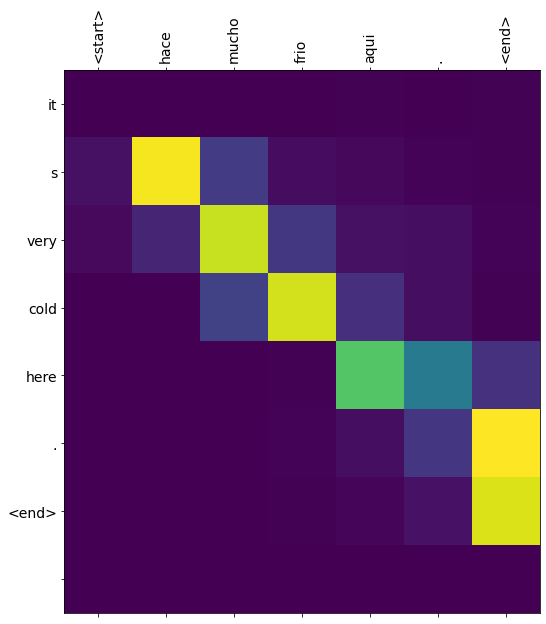

In [ ]:
translate(u'hace mucho frio aqui.')

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


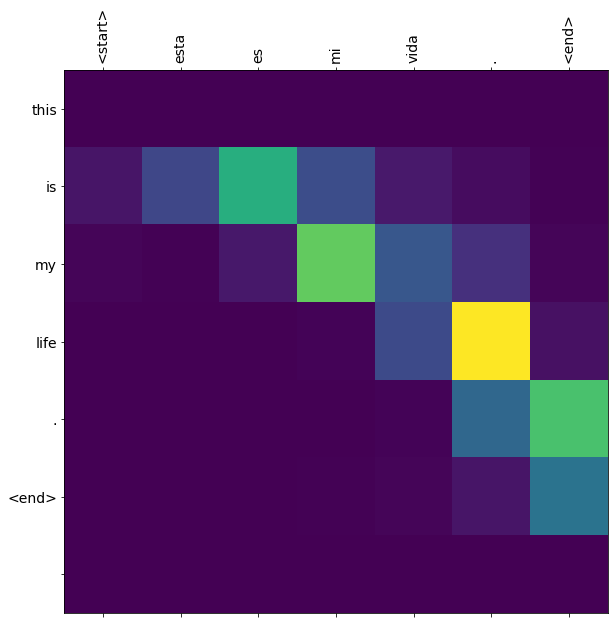

In [ ]:
translate(u'esta es mi vida.')

-----------------------------
------------------------

## Transformer : Attention is All You Need

<img src="https://fastly.syfy.com/sites/syfy/files/styles/2280x1280_hero/public/2020/01/transformers-last-knight.jpg?offset-x=0&offset-y=0" alt="transformer_electric" width="400"/>

트랜스포머는 기계 번역을 위한 새로운 모델로 이전에 등장했던 Attention 메커니즘을 극대화하여 뛰어난 번역 성능을 기록했습니다.<br/>최근 자연어처리 모델 SOTA(State-of-the-Art)의 기본 아이디어는 모두 트랜스포머를 기반으로 하고 있습니다.<br/>모델을 소개한 논문 [Attention is All You Need](https://arxiv.org/abs/1706.03762) 는 3년 사이에 18000번 이상 인용되었습니다.<br/> 트랜스포머가 자연어처리가 아닌 다른 문제도 잘 풀고있기 때문에 최근에는 컴퓨터 비전 쪽에서도 적용하려는 시도가 있으며, 멀티모달(Multi-Modal) 모델에도 적용되고 있습니다.<br/>

Attention을 적용하였든 그렇지 않든, RNN 기반 모델이 가진 특징은 단어가 **순서대로** 들어온다는 점입니다.<br/>처리해야 하는 시퀀스가 길수록 **연산 속도가 느려**집니다. **트랜스포머는 이런 문제를 해결하기 위해 등장한 모델**입니다.<br/>모든 토큰을 동시에 입력받아 병렬 연산하기 때문에 단어가 입력되기를 기다리지 않아도 된다는 장점이 있습니다.

아래는 트랜스포머의 구조를 단순하게 시각화한 그림입니다.<br/>인코더 블록과 디코더 블록이 6개씩 모여있습니다.  

<img src="http://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png" alt="positional_encoding" width="700" />

그림 하나를 더 보도록 하겠습니다. 아래는 논문이 제시한 트랜스포머의 구조입니다.<br/>그림을 보면 커다란 회색 블록이 2개 있습니다.<br/>왼쪽은 인코더 블록 하나를 나타내고 오른쪽은 디코더 블록 하나를 나타냅니다.<br/>인코더 블록은 크게 2개의 sub-layer **[`Multihead (Self) Attention`, `Feed Forward`]** 로 나눌 수 있습니다.<br/>디코더 블록은 3개의 sub-layer **[`Masked Multihead (Self) Attention`, `Multihead (Encoder-Decoder) Attention` `Feed Forward`]** 로 나눌 수 있습니다.

<img src="https://miro.medium.com/max/1400/1*BHzGVskWGS_3jEcYYi6miQ.png" alt="positional_encoding" width="550" />

### Positional Encoding (위치 인코딩)

<img width="400" alt="pe" src="https://user-images.githubusercontent.com/45377884/112799904-ecb3a100-90a9-11eb-9072-87a965e81a77.png">

트랜스포머에서는 모든 단어가 동시에 입력됩니다.<br/>그래서 단어의 위치 정보를 제공하기 위한 벡터를 따로 제공해주어야 합니다.<br/>단어의 상대적인 위치 정보를 제공하기 위한 벡터를 만드는 과정을 `Positional Encoding` 이라고 합니다.<br/>`Positional Encoding`은 아래와 같은 수식으로 이루어집니다. 수식이 복잡하니 일단은 식을 이해하려고 하지 않으셔도 됩니다.

$$
\begin{aligned}
\text{PE}_{\text{pos},2i} &= \sin \bigg(\frac{\text{pos}}{10000^{2i/d_{\text{model}}}}\bigg) \\
\text{PE}_{\text{pos},2i+1} &= \cos \bigg(\frac{\text{pos}}{10000^{2i/d_{\text{model}}}}\bigg)
\end{aligned}
$$


아래 `Positional Encoding`을 시각화한 자료로부터 일정한 패턴이 있는 벡터임을 볼 수 있습니다.<br/>이를 통해 단어의 상대적인 위치를 파악 `Positional Encoding`이 있는 이유를 이해하는 것에 집중하도록 합시다.

<img src="http://jalammar.github.io/images/t/transformer_positional_encoding_large_example.png" alt="positional_encoding" width="500" />

### Self-Attention
***(N434에서 이것만이라도 제대로 알고 넘어갑시다)***






<img width="300" alt="self-Attn" src="https://user-images.githubusercontent.com/45377884/112809266-ca735080-90b4-11eb-9a25-7f34f37880c7.png">

**Self-Attention** 은 트랜스포머의 주요 메커니즘입니다.

> *The animal didn't cross the street because <ins>it</ins> was too tired* 

위와 같은 문장을 제대로 번역하려면 **_"it"_** 과 같은 지시대명사가 어떤 대상을 가리키는지 알아야 합니다.<br/>번역하려는 문장 내부 요소의 관계를 잘 파악하기 위해서 문장 자신에 대해 어텐션 메커니즘을 적용합니다.<br/>이를 `Self-Attention`이라고 합니다.<br/>아래는 **_"it"_** 이 어떤 단어와 가장 연관되어 있는 지를 시각화한 그림입니다.

<img src="http://jalammar.github.io/images/t/transformer_self-attention_visualization.png" alt="self_attention_visualization" width="350" />


**`Self-Attention`**은 어떤 과정이길래 단어 사이의 관계를 알아낼 수 있을까요?<br/>비밀은 **3가지 가중치 벡터**에 있습니다.<br/>각 벡터는 **쿼리(Query), 키(Key), 밸류(Value)**라고 부릅니다.<br/>RNN의 Hidden state 벡터를 대체하기 위한 가중치 벡터라고 생각하시면 됩니다.<br/> 각각의 벡터가 어떤 역할을 하는지 알아보겠습니다.

- **쿼리(q)**는 분석하고자 하는 단어에 대한 가중치 벡터입니다.

- **키(k)**는 각 단어가 해당 쿼리와 얼마나 연관있는 지를 비교하기 위한 가중치 벡터입니다. 

- **밸류(v)**는 각 단어의 의미를 살려주기 위한 가중치 벡터입니다.

**`Self-Attention`**은 세 가지 가중치 벡터를 대상으로 어텐션을 적용합니다.

1. 먼저, **쿼리(q)와 모든 단어의 키(k) 벡터를 내적**합니다. 내적을 통해 나오는 값이 Attention 스코어(Score)가 됩니다.

2. 트랜스포머에서는 이 가중치를 q,k,v 벡터 차원 $d_k$ 의 제곱근 $\sqrt{d_k}$ 로 나누어줍니다. 계산값을 안정적으로 만들어주기 위한 계산 보정으로 생각해주시면 됩니다.  

3. 다음으로 **Softmax**를 취해주면 쿼리에 해당하는 단어와 문장 내 다른 단어가 가지는 관계의 비율을 구할 수 있습니다.

4. 마지막으로 **밸류(v) 각 단어의 벡터를 곱해준 후 모두 더하면** Self-Attention 과정이 마무리됩니다. 

**`Self-Attention`** 의 과정을 그림으로 다시 보겠습니다.

**1. 가중치 행렬 $W^Q, W^K, W^V$ 로부터 각 단어의 쿼리, 키, 밸류(q, k, v) 벡터를 만들어냅니다.**

<img src="http://jalammar.github.io/images/xlnet/self-attention-1.png" alt="transformer_15" width="600" />

**2. 분석하고자 하는 단어의 쿼리 벡터(q)와 문장 내 모든 단어(자신 포함)의 키 벡터(k)를 내적하여 각 단어와 얼마나 관련 정도를 구합니다.**

(아래 그림에서는 $\sqrt{d_k}$로 나누어 준 뒤에 Softmax를 취해주는 과정은 생략되었습니다.)


<img src="http://jalammar.github.io/images/xlnet/self-attention-2.png" alt="transformer_15" width="600" />

**3.  Softmax의 출력값과밸류 벡터(v)를 곱해준 뒤 더하면 해당 단어에 대한 Self-Attention 출력값을 얻을 수 있습니다.**

<img src="http://jalammar.github.io/images/xlnet/self-attention-3.png" alt="transformer_15" width="600" />

**4. 하나의 벡터에 대해서만 살펴보았지만 실제 Attention 계산은 행렬 단위로 병렬 계산됩니다.**

<img src="http://jalammar.github.io/images/xlnet/self-attention-summary.png" alt="transformer_15" width="600" />

실제로 각 벡터는 **행렬(Q, K, V)**로 한꺼번에 계산됩니다. $W^Q, W^K, W^V$ 는 학습 과정에서 갱신되는 파라미터로 이루어진 행렬입니다. 세 행렬과 단어 행렬을 내적하여 쿼리, 키, 밸류 행렬(Q, K, V)를 만들어냅니다.



<img src="http://jalammar.github.io/images/t/self-attention-matrix-calculation.png" alt="transformer_12" width="500" />

위에서 살펴본 바와 같이

1. 먼저 쿼리 행렬(Q)과 키 행렬(K)을 **내적**합니다.

2. 결과로 나오는 행렬의 요소를 $\sqrt{d_k}$ 로 **나누어 줍니다.**

3. 행렬의 각 요소에 `Softmax`를 취해줍니다. 

4. 마지막으로 **밸류 행렬(V)과 내적**하면 최종 결과 행렬(Z)이 반환됩니다.

<img src="http://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png" alt="transformer_13" width="700" />

아래는 `Tensorflow` 에서 Self-Attention을 구현한 코드입니다. 코드를 통해 Attention이 계산되는 과정을 다시 살펴보도록 합시다. 

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead) 
  but it must be broadcastable for addition.
  
  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable 
          to (..., seq_len_q, seq_len_k). Defaults to None.
    
  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

### Multi-Head Attention

다음으로 **`Multi-Head Attention`** 에 대해 알아보겠습니다.<br/>**`Multi-Head Attention`** 이란 **`Self-Attention`** 을 동시에 여러 개로 실행하는 것입니다.<br/>각 Head 마다 다른 Attention 결과를 내어주기 때문에 앙상블과 유사한 효과를 얻을 수 있습니다.<br/> 논문에서는 8개의 Head를 사용하였습니다.<br/>8번의 Self-Attention을 실행하여 각각의 출력 행렬 $Z_0, Z_1, \cdots , Z_7$ 을 만들어냅니다.

<img src="http://jalammar.github.io/images/t/transformer_attention_heads_z.png" alt="transformer_16" width="500"/>

출력된 행렬 $Z_n (n=0,\cdots,7)$ 은 **이어붙여집니다(Concatenate)**.<br/>또 다른 파라미터 행렬인 $W^o$ 와의 내적을 통해 Multi-Head Attention의 최종 결과인 행렬 $Z$를 만들어냅니다.<br/>여기서 행렬 $W^o$의 요소 역시 학습을 통해 갱신됩니다.<br/>최종적으로 생성된 행렬 $Z$는 토큰 벡터로 이루어진 행렬 $X$와 **동일한 크기(Shape)**가 됩니다.

<img src="http://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png" alt="transformer_17" width="500" />

### Layer Normalization & Skip Connection

<img width="300" alt="lnorm_resicon" src="https://user-images.githubusercontent.com/45377884/113169444-9056aa00-9280-11eb-8ba0-17c9211ad412.png">

트랜스포머의 모든 sub-layer에서 출력된 벡터는 **Layer normalization**과 **Skip connection**을 거치게 됩니다.<br/>Layer normalization의 효과는 Batch normalization과 유사합니다. 학습이 훨씬 빠르고 잘 되도록 합니다.<br/>Skip connection(혹은 Residual connection)은 역전파 과정에서 정보가 소실되지 않도록 합니다.<br/>Sprint3에서 배울 ResNet의 주요 메커니즘이므로 해당 부분에서 더욱 자세하게 다룰 예정입니다.

### Feed Forward Neural Network

<img width="300" alt="스크린샷 2021-03-29 오후 5 27 32" src="https://user-images.githubusercontent.com/45377884/112808809-58027080-90b4-11eb-8ca7-ffa38e577d3d.png">

다음으로 **`FFNN(Feed forward neural network)`** 로 들어갑니다.<br/>은닉층의 차원이 늘어났다가 다시 원래 차원으로 줄어드는 단순한 2층 신경망입니다.<br/>활성화 함수(Activation function)으로 ReLU를 사용합니다.

$$
\text{FFNN}(x) = \max(0, W_1x + b_1) W_2 +b_2
$$



### Masked Self-Attention


<img width="300" alt="Masked_Self-Attention_in_structure" src="https://user-images.githubusercontent.com/45377884/112808936-78322f80-90b4-11eb-9315-22cd9caad41d.png">

**Masked Self-Attention**은 디코더 블록에서 사용되는 특수한 Self-Attention입니다.<br/> 디코더는 Auto Regressive 하게 단어를 생성하기 때문에 타깃 단어 이후 단어를 보지 않고 단어를 예측해야 합니다.<br/>따라서 타깃 단어 뒤에 위치한 단어는 Self-Attention에 영향을 주지 않도록 **마스킹(masking)**을 해주어야 합니다.

<img width="500" alt="Masked_Self-Attention_ex" src="http://jalammar.github.io/images/xlnet/transformer-decoder-block-self-attention-2.png">

***Self-Attention (without Masking) vs Masked Self-Attention***

<img width="500" alt="Masked_Self-Attention_ex2" src="http://jalammar.github.io/images/gpt2/self-attention-and-masked-self-attention.png">

원래 Self-Attention 메커니즘은 쿼리 행렬(Q)와 키 행렬(K)의 내적으로 나온 행렬을 차원의 제곱근 $\sqrt{d_k}$ 로 나누어 준 다음 Softmax를 취해주고 밸류 행렬(V)과 내적하였습니다.

**`Masked Self-Attention`** 에서는 Softmax를 취해주기 전, 가려주고자 하는 요소에만 $-\infty$ 에 해당하는 매우 작은 수를 더해줍니다.<br/>아래 예시에서는 -10억(=-1e9)을 더해주었습니다.<br/>이 과정을 **마스킹(Masking)**이라고 합니다.<br/>마스킹된 값은 Softmax를 취해 주었을 때 0이 나오므로 Attention 메커니즘에 반영되지 않습니다.

<img width="600" alt="masked_1" src="http://jalammar.github.io/images/gpt2/transformer-attention-mask.png">

<img width="600" alt="masked_2" src="http://jalammar.github.io/images/gpt2/transformer-attention-masked-scores-softmax.png">

위에서 등장했던 Self-Attention을 구현 코드에서. `mask` 와 관련된 부분만 다시 보도록 합시다.

In [ ]:
# def scaled_dot_product_attention(q, k, v, mask):
#   """Calculate the attention weights.
#   q, k, v must have matching leading dimensions.
#   k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
#   The mask has different shapes depending on its type(padding or look ahead) 
#   but it must be broadcastable for addition.
  
#   Args:
#     q: query shape == (..., seq_len_q, depth)
#     k: key shape == (..., seq_len_k, depth)
#     v: value shape == (..., seq_len_v, depth_v)
#     mask: Float tensor with shape broadcastable 
#           to (..., seq_len_q, seq_len_k). Defaults to None.
    
#   Returns:
#     output, attention_weights
#   """

#   matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)
  
#   # scale matmul_qk
#   dk = tf.cast(tf.shape(k)[-1], tf.float32)
#   scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    
  """
    mask가 있을 경우 masking된 자리에는 (-inf)에 해당하는 절댓값이 큰 음수 -1e9(=-10억)을 더해줍니다.
    그 값에 softmax를 취해주면 거의 0에 가까운 값이 나옵니다. 그 다음 value 계산시에 반영되지 않습니다.
  """
    
  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)  


#   # softmax is normalized on the last axis (seq_len_k) so that the scores
#   # add up to 1.
#   attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

#   output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

#   return output, attention_weights

### Encoder-Decoder Attention

<img width="300" alt="Encoder-Decoder_Attention" src="https://user-images.githubusercontent.com/45377884/112809435-f8f12b80-90b4-11eb-96e1-3b0f7c530659.png">

디코더에서 Masked Self-Attention 층을 지난 벡터는 **Encoder-Decoder Attention** 층으로 들어갑니다.<br/>좋은 번역을 위해서는 번역할 문장과 번역된 문장 간의 관계 역시 중요합니다.<br/> 번역할 문장과 번역되는 문장의 정보 관계를 엮어주는 부분이 바로 이 부분입니다.

이 층에서는 **디코더 블록의** Masked Self-Attention으로부터 출력된 벡터를 **쿼리(Q)** 벡터로 사용합니다.<br/>**키(K)와 밸류(V)** 벡터는 최상위(=6번째) 인코더 블록에서 사용했던 값을 그대로 가져와서 사용합니다.<br/>**`Encoder-Decoder Attention`** 층의 계산 과정은 Self-Attention 했던 것과 동일합니다.

아래는 **`Encoder-Decoder Attention`** 가 진행되는 순서를 나타낸 이미지입니다.

<img width="700" alt="Encoder-Decoder_Attention_gif" src="http://jalammar.github.io/images/t/transformer_decoding_1.gif">

### Linear & Softmax Layer

이제 끝입니다!

<img width="300" alt="Linear_Softmax" src="https://user-images.githubusercontent.com/45377884/112815762-994a4e80-90bb-11eb-9a57-a8be65c1a30b.png">

디코더의 최상층을 통과한 벡터들은 Linear 층을 지난 후 Softmax를 통해 예측할 단어의 확률을 구하게 됩니다.

### 코드 실습

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

NameError: ignored

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

--------------------
-------------------------------------

## GPT, BERT & Others

이번에 배울 GPT와 BERT는 트랜스포머 구조의 일부분을 변형하여 만들어진 언어 모델입니다. 두 모델은 **사전 학습된 언어 모델(Pre-trained Language Model)** 이라는 공통점을 가지고 있습니다. 사전 학습이란 대량의 데이터를 사용하여 미리 학습하는 과정인데요. 여기에 필요한 데이터를 추가 학습시켜 모델의 성능을 최적화합니다. 이런 학습 방법을 전이 학습(Transfer Learning)이라고도 합니다. 최근 발표되고 있는 SOTA(최고 성능) 언어 모델은 모두 전이 학습을 사용한 모델입니다. 

이번 시간에는 대표적인 두 가지 사전 학습된 언어 모델, GPT와 BERT에 대해 개략적으로 알아보겠습니다. 그리고 이런 모델을 기반으로 최근 발표되는 모델의 경향성에 대해서도 알아보겠습니다.

### GPT (2018.6)

<img width="300" alt="Linear_Softmax" src="https://openai.com/content/images/2019/05/openai-cover.png">


**GPT**는 **G**enerative **P**re-trained **T**ransformer 의 약자로 2018년 6월에 OpenAI를 통해 발표되었습니다.<br/>연이어 발표한 GPT-2(2019.2), GPT-3(2020.6)가 좋은 성능을 보이면서 세간의 주목을 받았습니다.<br/>기사를 첨부해드리니 영상이 끝나고 추가적으로 읽어보시면 좋겠습니다. 

- 심화내용 : Generative란? (당장은 이해하지 못하셔도 좋습니다) - [discriminative vs generative](https://ratsgo.github.io/generative%20model/2017/12/17/compare/)

- GPT2 기사
    - [The AI that was too dangerous to release](https://blog.floydhub.com/gpt2/)
    - [OpenAI, 공유하기에는 너무 위험한 ‘텍스트 생성 AI’의 진실](http://www.aitimes.com/news/articleView.html?idxno=121589)

- GPT3 기사
    - [A GPT-3 bot posted comments on Reddit for a week and no one noticed](https://www.technologyreview.com/2020/10/08/1009845/a-gpt-3-bot-posted-comments-on-reddit-for-a-week-and-no-one-noticed/)
    - [GPT3가 쓴 뉴스가 랭킹 1위, 사람을 이겼다](http://www.aitimes.com/news/articleView.html?idxno=131593)



GPT-1, GPT-2, GPT-3가 전부 동일하지는 않지만 기본적으로 동일한 구조를 가지고 있습니다.

GPT의 구조를 알아보기 전에 기본이 되는 아이디어인 **사전 학습(Pre-training)** 이라는 아이디어에 대해서 알아보겠습니다.

- **사전 학습된 언어 모델 (Pre-trained LM)**

혹시 아래와 같은 케이스를 본 적 있으신가요?

<img width="500" alt="pre-train" src="https://user-images.githubusercontent.com/45377884/112774307-3e413900-9074-11eb-94ab-f3bc000ff95e.png">


수능 국어 시험에서 책을 많이 읽은 학생은 조금만 공부해도 상위권 성적을 유지하는 경우가 종종 있습니다.<br/> GPT에서 사용된 **사전 학습**이라는 아이디어도 유사한 생각에서 시작되었습니다.<br/>아래 그림을 보며 사전 학습 언어 모델에 대해서 설명을 이어나가겠습니다.

<img width="700" alt="Pre-training" src="https://user-images.githubusercontent.com/45377884/112943247-35cc2980-916c-11eb-99be-2fa7657507d2.png">

사전 학습 언어 모델은 크게 2가지 과정을 통해 완성됩니다. 첫 번째가 **사전 학습(Pre-training)**입니다. 

존재하는 자연어 중에는 책(Book corpus)이나 위키피디아(Wiki corpus) 등 레이블링 되지 않은 데이터가 더 많습니다.<br/>여러분이 지금 읽고 있는 강의 노트 역시 레이블링 되지 않은 자연어 데이터 입니다.<br/>
책을 많이 읽는 것처럼 레이블링 되지 않은 데이터를 모델이 학습하도록 하는 과정을 **사전 학습** 이라고 합니다.

사전 학습이 끝난 모델에 우리가 하고자하는 태스크에 특화된(Task specific) 데이터를 학습합니다.<br/> 이를 **Fine-tuning** 이라고 합니다.<br/> Fine-tuning에서는 학습시 레이블링 된 데이터 [Ex) 감성 분석, 자연어 추론(NLI), 질의 응답(QA)] 를 사용합니다.

- **모델 구조 (그림은 6개의 디코더 블록을 사용하지만 GPT는 12개의 블록을 사용합니다.)**

<img width="700" alt="Pre-training" src="http://jalammar.github.io/images/xlnet/transformer-decoder-intro.png">

GPT에서는 인코더를 사용하지 않기 때문에 디코더 블록내에 **2개의 Sub-layer**만 있습니다. 트랜스포머의 디코더 블록에서는 Masked Self-Attention을 지나서 Encoder-Decoder Attention 층으로 들어갔습니다. 하지만 GPT는 인코더를 사용하지 않으므로 Encoder-Decoder Attention층이 빠지게 됩니다.

- **사전 학습(Pre-training)**

레이블링 되지 않은 대량의 말뭉치 $U = (u_1, \cdots , u_n)$ 에 대해 로그 우도 $L_1$ 을 최대화하는 방향으로 학습됩니다. 다음에 올 단어를 계속해서 맞추는 방식으로 학습합니다.

$$
L_1(U) = \sum_i \log P(u_i \vert u_{i-k}, \cdots, u_{i-1}; \Theta)
$$

- **Fine-tuning**

기존 모델에서는 태스크에 맞춰 모델 구조를 변경해주고 학습을 진행시켰습니다.

하지만 GPT와 같은 사전 학습 언어 모델은 Fine-tuning 과정에서 데이터의 입력 방식만을 변형시키고 모델 구조는 일정하도록 설계되었습니다.

<img width="600" alt="fine-tune_structure" src="https://user-images.githubusercontent.com/45377884/112949500-408abc80-9174-11eb-8090-4f0be34db572.png">


Fine-tuning은 레이블링 된 말뭉치 $C = (x_1, \cdots , x_m)$ 에 대하여 로그 우도 $L_2$ 를 최대화하는 방향으로 학습합니다.

$$
L_2(C) = \sum_{(x,y)} \log P(y \vert x_1, \cdots , x_m)
$$

Fine-tuning에서 학습하는 데이터셋이 클 때는 보조 목적함수로 $L_1$ 을 추가하여 $L_3$로 학습하면 학습이 더 잘 진행됩니다.

$$
L_3(C) = L_2(C) + \lambda \cdot L_1(C)
$$

- **결과 & 결론**

LSTM, GRU를 사용한 기존 모델보다 자연어 추론(NLI), 질의 응답(QA), 분류(Classification) 등의 태스크에서 높은 성능을 달성하였습니다.<br/>GPT는 사전 학습된 언어 모델을 바탕으로 좋은 성능을 확보할 수 있다는 점과 사전 학습 모델에 Transformer 구조가 더 좋은 성능을 보임을 알 수 있었습니다.

### BERT (2018.10)

<img width="600" alt="model_name" src="https://user-images.githubusercontent.com/45377884/112963631-88184500-9182-11eb-8c87-f470e25d7567.png">

> [다양한 캐릭터 이름을 딴 NLP 모델](https://towardsdatascience.com/machine-learnings-obsession-with-kids-tv-show-characters-728edfb43b3c)

**BERT**(**B**idirectional **E**ncoder **R**epresentation by **T**ransformer)는 2018년 10월 구글에서 발표한 모델입니다.

모델 이름에서 알 수 있듯 BERT는 트랜스포머의 인코더만을 사용하여 양방향(Bidirectional)으로 읽어냅니다.

- **구조**






GPT가 트랜스포머의 디코더 블록을 12개 쌓아올린 모델이었다면 **BERT는 트랜스포머의 인코더 블록**을 12개 쌓아올린 모델입니다.


<img width="500" alt="model_name" src="http://jalammar.github.io/images/bert-base-bert-large-encoders.png">

BERT 역시 GPT 와 동일한 Pre-trained LM 이기 때문에 Pre-training과 Fine-tuning 과정을 통해 학습됩니다.

- **사전 학습(Pre-training)**

BERT의 특이한 사전 학습 방법을 사용합니다. BERT의 사전 학습 과정에서 사용되는 **2가지 방법(MLM, NSP)**을 알아보겠습니다.

> **MLM(Masked Language Model)**

첫 번째는 MLM(Masked Language Model) 입니다. 혹시 아래와 같은 문제를 풀어보신 경험이 있으신가요?

<img width="300" alt="mlm" src="https://thumb.mt.co.kr/06/2013/11/2013110718224659109_1.jpg/dims/optimize/">

영어 시험을 한 번쯤 준비해보신 분이라면 빈칸 채우기 유형 문제를 풀어보신 적이 있을 것입니다. 보통은 빈칸에 문법적/의미적으로 올바른 단어를 채우게 됩니다.

BERT도 이처럼 **빈칸 채우기**를 하면서 단어를 학습합니다.<br/>BERT는 사전 학습 과정에서 레이블링 되지 않은 말뭉치 중에서 랜덤으로 15\%가량의 단어를 마스킹합니다.<br/>그리고 마스킹된 위치에 원래 있던 단어를 예측하는 방식으로 학습을 진행합니다.

<img width="600" alt="mlm_example" src="http://jalammar.github.io/images/BERT-language-modeling-masked-lm.png">

MLM은 양쪽의 문맥을 동시에 볼 수 있다는 장점이 있습니다.

아래 그림은 GPT와 BERT의 학습 방향을 비교하여 나타낸 그림입니다.

<img width="300" alt="gpt_vs_bert" src="https://user-images.githubusercontent.com/45377884/113259927-a445ee80-9308-11eb-8fbd-95d5f553480a.png">

GPT는 ***'거기'*** 라는 단어를 예측할 때 '어제 카페 갔었어'의 정보만 볼 수 있습니다.<br/>
하지만 BERT는 빈칸에 들어갈 ***'거기'*** 라는 단어를 예측 할 때 '어제 카페 갔었어'뿐만 아니라 '사람 많더라'의 정보도 참고할 수 있습니다.<br/>
이렇게 양방향으로 학습할 경우 단어가 문맥 사이에서 가진 의미를 최대로 학습할 수 있습니다.

MLM은 다소 간단한 아이디어이지만 단어의 문맥적 의미를 최대로 학습할 수 있도록 함으로써 BERT가 높은 성능을 달성하는 데에 커다란 역할을 하였습니다.<br/>다음으로 2번째 방법인 NSP에 대해서 알아보겠습니다.

> **NSP(Next Sentence Prediction)**

BERT는 NSP(Next Sentence Prediction) 방식으로도 학습합니다. 동문서답이라는 사자성어 알고 계신가요?

<img width="350" alt="nsp_idea" src="https://thx.sfo2.cdn.digitaloceanspaces.com/wr/hanja_images/%E6%9D%B1%E5%95%8F%E8%A5%BF%E7%AD%94_800.jpg">

NSP는 모델이 문맥에 맞는 이야기를 하는지 아니면 동문서답을 하는지 아닌지를 판단하며 학습하는 방식입니다.<br/>NSP에 대해 알아보기 전에 BERT에 있는 두 가지 Special Token에 대해 알아보겠습니다.<br/>BERT의 Special Token은 `[SEP]`(Separation)과 `[CLS]`(Classification)이 있습니다.

BERT는 사전 학습 시에 텍스트를 2개로 나눠서 넣게 됩니다.<br/>`[CLS]`는 모든 단어 토큰 앞에 위치하고, `[SEP]`은 두 텍스트 사이와 맨 마지막에 위치합니다.<br/>NSP는 가운데 `[SEP]` 토큰 뒤에 오는 텍스트가 이전 텍스트와 이어지는 부분인지를 `[CLS]`를 통해 예측합니다.

두 문장이 바로 이어지는 문장일 경우 **`IsNext`** 로 판단하며 그렇지 않은 문장 쌍일 경우  **`NotNext`** 를 판단하도록 합니다.

<img width="500" alt="nsp_1" src="http://jalammar.github.io/images/bert-next-sentence-prediction.png">

아래는 드라마 대본을 예시로 NSP가 어떻게 작동하는 지를 나타낸 그림입니다.

<img width="500" alt="nsp_2" src="https://user-images.githubusercontent.com/45377884/86514846-d0067780-be4f-11ea-9809-c3e43b8ad3f9.png">     

<img width="500" alt="nsp_3" src="https://user-images.githubusercontent.com/45377884/86514847-d137a480-be4f-11ea-82be-d229bf75fbf8.png">

NSP 역시 간단한 아이디어지만 모델이 문장과 문장 사이의 관계를 학습할 수 있도록 함으로써 질의응답(QA), 자연어 추론(NLI) 등의 태스크에서 좋은 성능을 보일 수 있었습니다.

- **Fine-tuning**

BERT 역시 모델의 구조는 그대로 유지한 채 데이터를 입력하는 형태만 바꾸어서 Fine-tuning을 실시합니다.

<img width="700" alt="nsp_2" src="http://jalammar.github.io/images/bert-tasks.png">

(a)는 “Sentence” 쌍을 분류하는 태스크입니다. `[SEP]`으로 나눠진 “Sentence” 쌍을 입력받아 `[CLS]`가 출력하는 클래스를 반환합니다.

(b)는 감성분석 등 하나의 문장을 입력하여 `[CLS]`로 해당 문장을 분류하는 태스크입니다.

(c)는 질의 응답 태스크입니다. 질문과 본문에 해당하는 단락을 `[SEP]` 토큰으로 나누어 입력하면 질문에 대한 답을 출력하도록 합니다.

(d)는 품사 태깅(POS tagging)이나 개체명 인식(Named Entity Recognition, NER) 등의 태스크입니다. 입력받은 각 토큰마다 답을 출력합니다.

- **결과 & 결론**

BERT는 간단한 사전 학습 아이디어로 많은 태스크에서 SOTA를 달성하였습니다.<br/>단순한 아이디어를 통해 엄청난 성능을 달성하였기에 당시 많은 충격을 주었습니다. 이후로도 BERT를 개선하기 위한 연구가 많이 진행되었습니다.

특히 MLM을 통해 BERT가 좋은 성능을 달성한 뒤로 텍스트에 노이즈를 준 후에 이를 다시 맞추는(Denoising) 방법에 대해 많은 연구가 진행되었습니다.

### Beyond BERT

- **더 큰 모델 만들기**

<img width="700" alt="getting_bigger" src="https://www.microsoft.com/en-us/research/uploads/prod/2020/02/TurningNGL_Model__1400x788.png">

GPT(2018.6)와 BERT(2018.10) 이후로도 수많은 모델이 발표되어 왔습니다. 이후 발표되고 있는 모델의 주요 경향성 중 하나는 **모델 크기 키우기** 입니다.<br/>위 그림에서 볼 수 있듯  GPT와 BERT이후 발표되는 모델의 파라미터 수는 기하급수적으로 증가하고 있습니다.

특히 작년 6월에 발표된 GPT-3의 파라미터 개수는 약 1750억 개로 위 그림에 나와있는 T-NLG보다도 10배나 많은 파라미터 수를 가지고 있습니다.<br/>크기를 키울수록 더 좋은 성능을 보여주고 있기 때문에 계속해서 키우고 있는 상황입니다. <br/>하지만 사전 학습에 따른 비용 문제 등 크기만 커지는 모델에 대한 우려의 시각도 있습니다.

<img width="400" alt="getting_bigger_gpt3" src="https://miro.medium.com/max/1164/1*C-KNWQC_wXh-Q2wc6VPK1g.png">

- **더 좋은 학습 방법을 적용하거나 가벼운 모델 만들기**

기존 GPT나 BERT의 단점을 보완하는 방향의 연구도 지속되고 있습니다. 트랜스포머의 디코더 블록만을 사용한 GPT와 인코더 블록만을 사용한 BERT는 상대적으로 쓰기(생성)와 읽기(자연어 이해)에 특화된 모델입니다.<br/>**두 모델이 사용했던 방법을 결합하거나 심화**시킨 모델로 더 좋은 성능을 얻을 수 있었습니다.<br/>대표적인 모델로 Masking 방법에 변화를 주는 SpanBERT, RoBERTa나 Noising 방법에 변화를 준 XLNet이나 BART 등의 모델이 있습니다.

<img width="500" alt="bart" src="https://miro.medium.com/max/1400/0*MeyyeTYxwtSZJPiL">   


<img width="500" alt="bart_noising" src="https://www.weak-learner.com/assets/img/blog/personal/bart_transformations.png">

모델 자체가 크다 보니 사이즈를 줄이되 성능은 보전하는 쪽으로도 많은 연구가 진행되고 있습니다.<br/> DistillBERT, ALBERT(A Light BERT) 나 Electra가 이런 방향으로 연구된 대표적인 모델이라고 할 수 있습니다.<br/>아래는 GAN-Like 방법을 적용한 Electra의 모델 구조인데요. 이런 모델 모두가 다양한 방법을 이용해서 BERT의 크기를 줄이고 효율성을 높였습니다.


<img width="500" alt="bart_noising" src="https://1.bp.blogspot.com/-sHybc03nJRo/XmfLongdVYI/AAAAAAAAFbI/a0t5w_zOZ-UtxYaoQlVkmTRsyFJyFddtQCLcBGAsYHQ/s1600/image1.png">

- **여러 방면에서의 다양한 시도**

T5나 GPT-3와 같은 모델은 하나의 모델로 더욱 다양한 태스크를 수행할 수 있는 모델입니다.<br/>특히 GPT-3는 Few-shot learning 방법론을 적용한 모델로 적당한 길이의 제시문만 주어주면 Fine-tuning 없이도 엄청나게 좋은 성능을 보여줍니다.<br/>N-shot learning 에 대해서는 아래 자료를 참고하시면 됩니다.

1. ***파인튜닝(finetuning)*** : 다운스트림 태스크에 해당하는 데이터 전체를 사용합니다. 모델 전체를 다운스트림 데이터에 맞게 업데이트합니다.

2. ***제로샷러닝(zero-shot learning)*** : 다운스트림 태스크 데이터를 전혀 사용하지 않습니다. 모델이 바로 다운스트림 태스크를 수행합니다.

3. ***원샷러닝(one-shot learning)*** : 다운스트림 태스크 데이터를 한 건만 사용합니다. 모델 전체를 1건의 데이터에 맞게 업데이트합니다. 업테이트 없이 수행하는 원샷러닝도 있습니다. 모델이 1건의 데이터가 어떻게 수행되는지 참고한 뒤 바로 다운스트림 태스크를 수행합니다.

4. ***퓨샷러닝(few-shot learning)*** : 다운스트림 태스크 데이터를 몇 건만 사용합니다. 모델 전체를 몇 건의 데이터에 맞게 업데이트합니다. 업데이트 없이 수행하는 퓨삿러닝도 있습니다. 모델이 몇 건의 데이터가 어떻게 수행되는지 참고한 뒤 바로 다운스트림 태스크를 수행합니다.

**다국어(multilingual) 모델** 역시 열심히 연구되고 있는 분야입니다.<br/>보통의 경우 단일 말뭉치로만 사전 학습을 진행하기 때문에 여러 언어를 사용하고자 하면 성능이 급격히 저하되는 경우가 많습니다.

다양한 태스크에서 언어를 넘나들며 사용할 수 있는 모델 역시 많이 연구되고 있습니다.<br/>대표적인 모델로는 mBART(multi-lingual BART), mT5(multi-lingual T5) 등이 있습니다.



지난 1월에는 GPT를 발표했던 OpenAI에서 DALL-E 라는 재미있는 모델을 발표했습니다. 이 모델은 텍스트로부터 이미지를 생성합니다.<br/>이렇게 자연어를 넘어 다양한 매체로 기계와 소통하는 **멀티모달(Multi-Modal)**에 대한 연구도 활발하게 진행되고 있습니다.<br/>특히 트랜스포머가 멀티모달 문제를 푸는 데에 굉장히 좋은 성능을 보이고 있기 때문에 이를 활용하여 다양한 문제를 풀고자 하고있습니다.



<img width="700" alt="dall-e" src="https://user-images.githubusercontent.com/45377884/113083201-b9425500-9216-11eb-989a-3e5f28a794e5.png">

## Review

학습 목표에 대해 다시 생각해봅시다.

- Attention의 장점에 대해서 생각하고 설명해봅니다.

    - RNN 모델의 단점 2가지
    - 장기 의존성(Long-term dependency)
    - Attention의 장점

- Transformer의 장점과 구조에 대해서 생각하고 설명해봅니다.
    - "Attention is All You Need" (왜 논문 제목을 이렇게 지었을지에 대해서 생각해봅시다)
    - Positional Encoding
    - Self-Attention
    - Masked Self-Attention
    - Encoder-Decoder Attention


- GPT & BERT
    - 사전 학습 언어 모델(Pretrained Language Model), 전이 학습(Transfer Learning)
        - 사전 학습(Pre-training)
        - Fine-tuning
    - GPT의 구조
    - BERT의 구조
        - MLM(Masked Langauge Model)
        - NSP(Next Sentence Prediction)

        

## 참고 자료

- Attention에 대해 자세하게 알고 싶다면
    - [Visualizing A Neural Machine Translation Model](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/) (Mechanics of Seq2seq Models With Attention)
    - [번역](https://nlpinkorean.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
    - [Paper](https://arxiv.org/pdf/1409.0473.pdf) (Neural machine translation by jointly learning to align and translate)

- 트랜스포머에 대해 조금 더 자세하게 알고 싶다면
    - [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
    - [번역](https://nlpinkorean.github.io/illustrated-transformer/)
    - [Paper](https://arxiv.org/pdf/1706.03762.pdf) (Attention is All You Need)

- GPT에 대해 더 자세하게 알고 싶다면
    - [The Illustrated GPT-2](http://jalammar.github.io/illustrated-gpt2/) (Visualizing Transformer Language Models)
    - [Paper](https://www.cs.ubc.ca/~amuham01/LING530/papers/radford2018improving.pdf) (Improving Language Understanding by Generative Pre-Training)

- BERT에 대해 더 자세하게 알고 싶다면
    - [The Illustrated BERT, ELMo, and co.](http://jalammar.github.io/illustrated-bert/) (How NLP Cracked Transfer Learning)
    - [번역](https://nlpinkorean.github.io/illustrated-bert/)
    - [Paper](https://arxiv.org/pdf/1810.04805.pdf) (Pre-training of Deep Bidirectional Transformers for
Language Understanding)